In [2]:
from src import SpotifyService
from src.utils import split_into_batches
from src.data_process import preprocess_data, plot_feature_dists, calc_correlation, plot_correlation
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
service = SpotifyService()

In [3]:
artist = 'JPEGMAFIA'

In [4]:
tracks_s = service.get_songs_from_artist_name(artist)

In [5]:
len(tracks_s)

225

In [6]:
chunks = split_into_batches(tracks_s.values)

In [7]:
audio_feats_df = service.get_audio_feats_full(chunks)

In [8]:
audio_feats_df['popularity'] = audio_feats_df['id'].apply(service.get_popularity_from_track_id)

In [9]:
audio_feats_df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity
0,0.875,0.738,9,-4.635,0,0.2540,0.611,0.000001,0.800,0.725,124.012,audio_features,0ekzigrO6pKmtR2sOc9PW7,spotify:track:0ekzigrO6pKmtR2sOc9PW7,https://api.spotify.com/v1/tracks/0ekzigrO6pKm...,https://api.spotify.com/v1/audio-analysis/0ekz...,224052,4,22
1,0.754,0.577,1,-8.303,1,0.0489,0.635,0.030300,0.101,0.145,119.031,audio_features,014mptUDz79PDjWF97l9Gf,spotify:track:014mptUDz79PDjWF97l9Gf,https://api.spotify.com/v1/tracks/014mptUDz79P...,https://api.spotify.com/v1/audio-analysis/014m...,150599,4,32
2,0.487,0.964,4,-1.582,0,0.4040,0.169,0.000000,0.338,0.738,157.080,audio_features,3FsqOTQT3d7c296eStnEnl,spotify:track:3FsqOTQT3d7c296eStnEnl,https://api.spotify.com/v1/tracks/3FsqOTQT3d7c...,https://api.spotify.com/v1/audio-analysis/3Fsq...,107567,4,64


In [10]:
os.makedirs("./data", exist_ok=True)
audio_feats_df.to_csv(f"./data/{artist.lower().replace(' ', '-')}.csv", index=False)

In [3]:
df = pd.read_csv("./data/jpegmafia.csv")

In [4]:
data = preprocess_data(df)
data

,id,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
0,0ekzigrO6pKmtR2sOc9PW7,22,0.875,0.738,-4.635,0,0.2540,0.6110,0.000001,0.8000,0.725,124.012,3.734200
1,014mptUDz79PDjWF97l9Gf,32,0.754,0.577,-8.303,1,0.0489,0.6350,0.030300,0.1010,0.145,119.031,2.509983
2,3FsqOTQT3d7c296eStnEnl,64,0.487,0.964,-1.582,0,0.4040,0.1690,0.000000,0.3380,0.738,157.080,1.792783
3,7cHXss4b7AzJiofmG3TGig,44,0.755,0.772,-3.661,0,0.2870,0.1290,0.000000,0.2280,0.755,135.889,3.097083
4,1y9qNcq3sE0HQmcP0zjvkz,31,0.854,0.467,-9.144,1,0.2310,0.1990,0.000046,0.1190,0.241,125.093,2.389633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,6zCfKwH7wcqM4Jcrlo1Rjt,0,0.694,0.923,-1.077,0,0.0793,0.1530,0.000000,0.0582,0.676,119.097,2.016433
221,7JxRr2baHFCCHsAfNxgJz4,45,0.579,0.711,-5.725,1,0.0955,0.2080,0.000000,0.3500,0.405,123.906,3.232933
222,0JAMaeQT2q752l45O6drVw,31,0.698,0.850,-5.088,1,0.2220,0.3790,0.000083,0.5270,0.807,113.849,2.427767
223,0ubyD2iLcA6W90tMaKyXs2,41,0.777,0.823,-5.067,1,0.2820,0.2610,0.000000,0.1110,0.403,119.886,2.733333


In [5]:
# check dtypes
data.dtypes

id                   object
popularity            int64
danceability        float64
energy              float64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_mins       float64
dtype: object

In [6]:
data.describe()

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,33.688889,0.626467,0.762049,-4.903222,0.697778,0.252187,0.246973,0.067824,0.351469,0.440884,121.160191,3.050758
std,15.626246,0.150472,0.149294,2.833968,0.460245,0.160528,0.223732,0.202913,0.226874,0.225915,21.380148,1.042939
min,0.000000,0.213000,0.287000,-16.090000,0.000000,0.031800,0.000610,0.000000,0.054900,0.038600,57.257000,0.731067
25%,21.000000,0.524000,0.667000,-6.150000,0.000000,0.117000,0.072200,0.000000,0.151000,0.253000,107.644000,2.393817
50%,38.000000,0.618000,0.771000,-5.100000,1.000000,0.238000,0.174000,0.000002,0.310000,0.407000,121.575000,2.911667
75%,44.000000,0.723000,0.887000,-3.427000,1.000000,0.349000,0.363000,0.000929,0.463000,0.644000,134.648000,3.615217
max,64.000000,0.949000,0.996000,2.383000,1.000000,0.888000,0.930000,0.986000,0.957000,0.888000,183.985000,6.747350


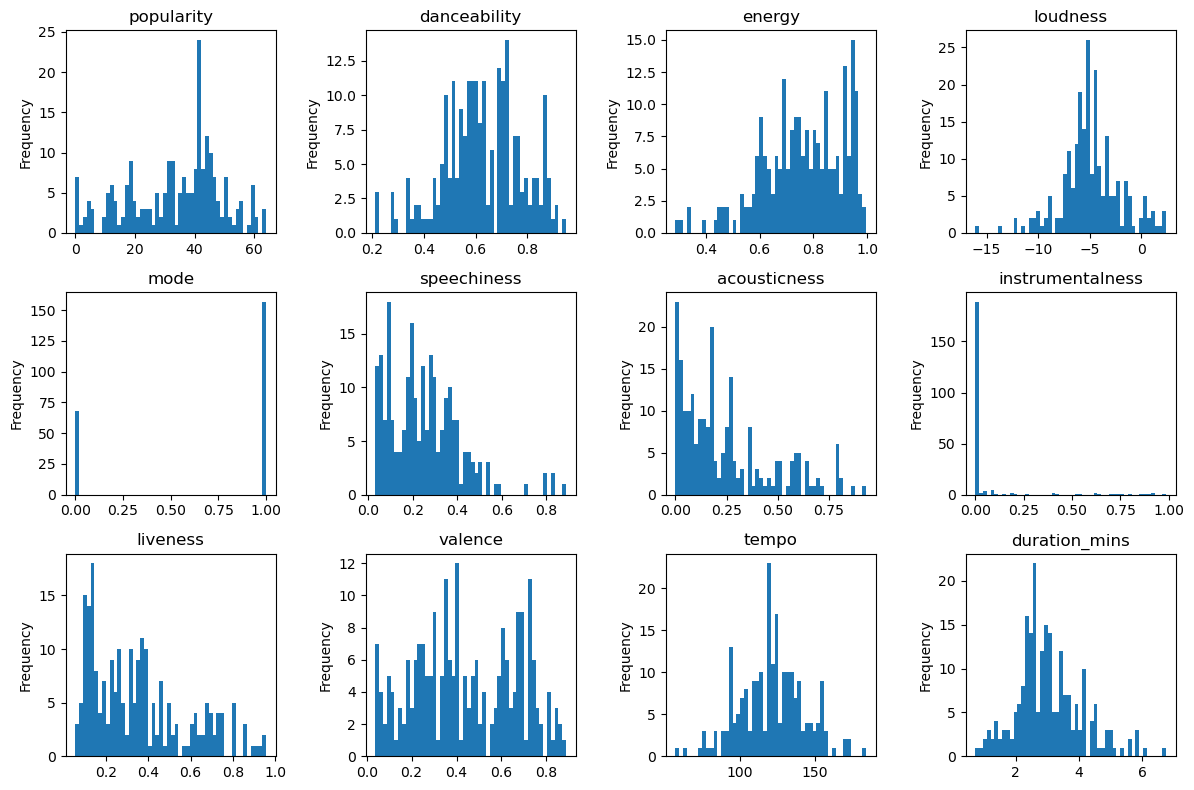

In [7]:
plot_feature_dists(data)
plt.show()

In [8]:
corr = calc_correlation(data)
corr

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
popularity,1.000000,-0.193981,0.281789,0.398113,-0.046031,0.117266,-0.047688,-0.351794,-0.050614,0.331615,0.175236,-0.256757
danceability,-0.193981,1.000000,-0.121167,-0.027317,-0.094713,-0.183907,-0.074633,0.038678,0.105724,0.140054,0.002968,0.003156
energy,0.281789,-0.121167,1.000000,0.786741,0.133732,0.353116,-0.346535,-0.253481,0.150903,0.478489,0.235511,-0.222813
loudness,0.398113,-0.027317,0.786741,1.000000,0.022309,0.167417,-0.301436,-0.321369,0.115070,0.539979,0.268116,-0.304744
mode,-0.046031,-0.094713,0.133732,0.022309,1.000000,0.064563,-0.087606,0.037501,0.043673,-0.083347,-0.172900,0.066811
speechiness,0.117266,-0.183907,0.353116,0.167417,0.064563,1.000000,0.004029,-0.236524,0.032291,0.196169,0.158403,0.136335
acousticness,-0.047688,-0.074633,-0.346535,-0.301436,-0.087606,0.004029,1.000000,-0.092100,0.044773,-0.067250,-0.133828,0.151174
instrumentalness,-0.351794,0.038678,-0.253481,-0.321369,0.037501,-0.236524,-0.092100,1.000000,0.033164,-0.283278,-0.056787,0.115662
liveness,-0.050614,0.105724,0.150903,0.115070,0.043673,0.032291,0.044773,0.033164,1.000000,0.182060,-0.076989,0.158150
valence,0.331615,0.140054,0.478489,0.539979,-0.083347,0.196169,-0.067250,-0.283278,0.182060,1.000000,0.136001,-0.348636


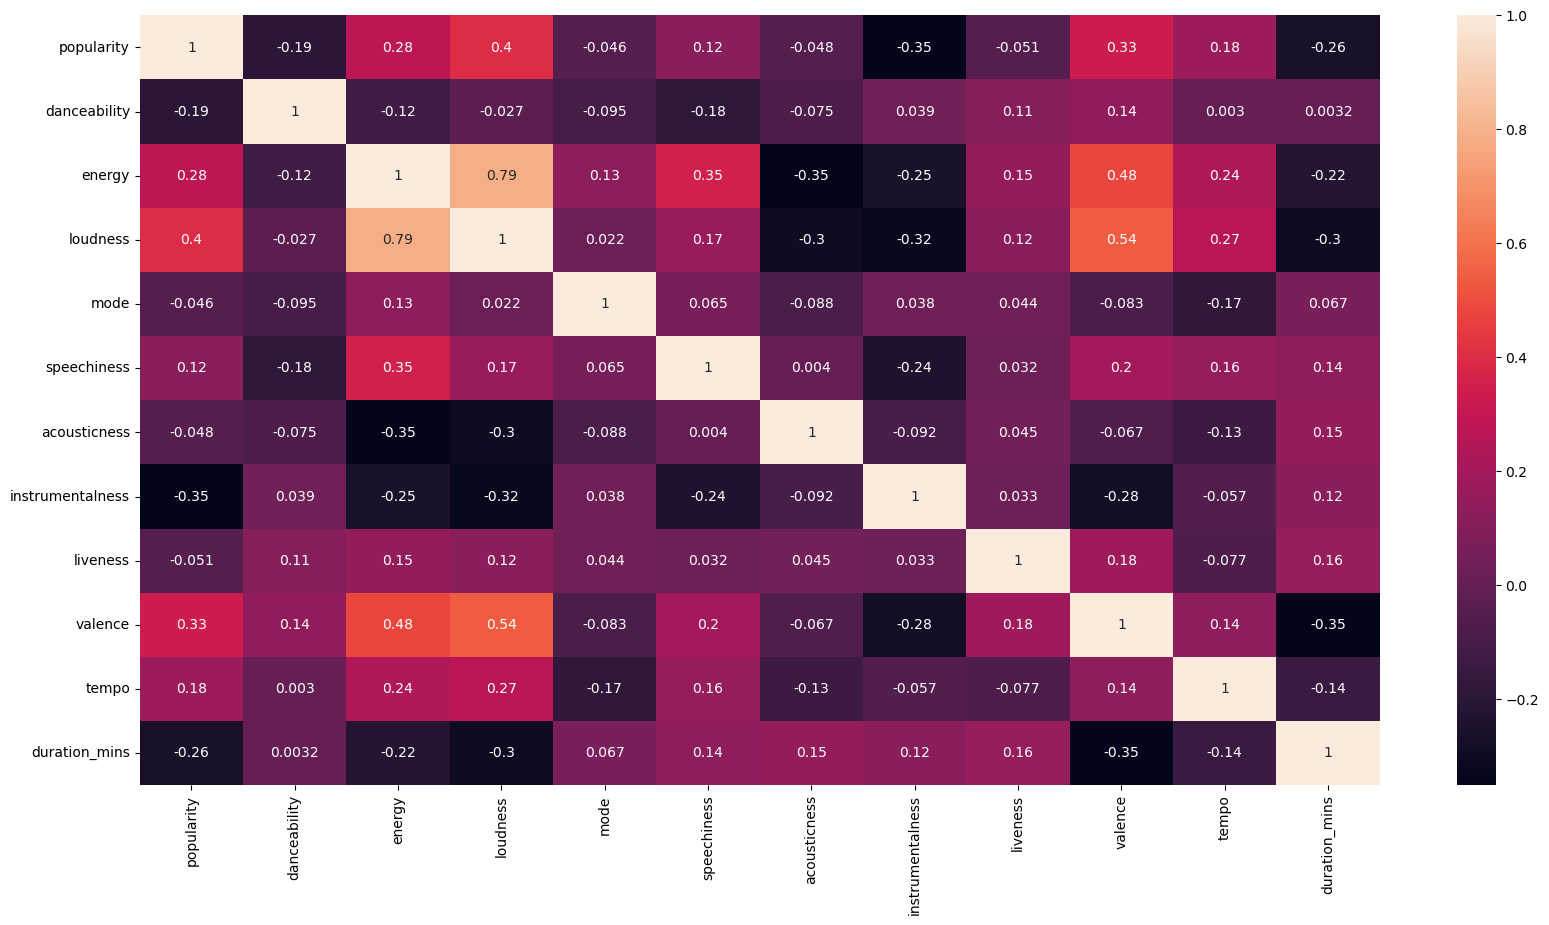

In [9]:
plot_correlation(corr)
plt.show()

In [14]:
corr.abs().unstack().sort_values(kind='quicksort', ascending=False)

popularity     popularity       1.000000
danceability   danceability     1.000000
tempo          tempo            1.000000
valence        valence          1.000000
liveness       liveness         1.000000
                                  ...   
acousticness   speechiness      0.004029
danceability   duration_mins    0.003156
duration_mins  danceability     0.003156
danceability   tempo            0.002968
tempo          danceability     0.002968
Length: 144, dtype: float64

In [16]:
feature_cols = [
        'popularity',
        'danceability',
        'energy',
        # 'key',
        'loudness',
        'mode',
        'speechiness',
        'acousticness',
        'instrumentalness',
        'liveness',
        'valence',
        'tempo',
        'duration_mins',
        # 'time_signature',
    ]

df_num = data[feature_cols].select_dtypes('number')

In [19]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_num, 5))

Top Absolute Correlations
energy      loudness       0.786741
loudness    valence        0.539979
energy      valence        0.478489
popularity  loudness       0.398113
energy      speechiness    0.353116
dtype: float64
